In [1]:
import torch
from torchvision.transforms import v2
from matplotlib import pyplot as plt

from dataset import BUSI
from dataset import CT2US

import random

/home/rikhat.akizhanov/Desktop/std_env/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/rikhat.akizhanov/Desktop/std_env/lib/python3.8/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please s

In [5]:


# dataset = BUSI(root="datasets/BUSI", image_transform=image_transform, mask_transform=mask_transform)
# print(len(dataset))


In [2]:
# plot random images with masks and labels

indeces = random.sample(range(len(dataset)), 5)

fig, axs = plt.subplots(5, 2, figsize=(7, 10))

for i, idx in enumerate(indeces):
    image, mask, target = dataset[idx]
    axs[i, 0].imshow(image[0], cmap="gray")
    axs[i, 1].imshow(mask[0], cmap="gray")
    axs[i, 0].set_title(f"Image {idx}, label {target}")
    axs[i, 1].set_title(f"Mask {idx}, label {target}")

    axs[i, 0].axis("off")
    axs[i, 1].axis("off")

NameError: name 'dataset' is not defined

In [14]:
transforms = v2.Compose([
    v2.ToImageTensor(),
    v2.ToDtype(torch.float32),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    v2.RandomRotation(degrees=(0, 15)),
    v2.RandomAffine(degrees=(0, 15), translate=(0.1, 0.1), scale=(0.9, 1.1), shear=(-10, 10, -10, 10)),
    v2.RandomResizedCrop(128, scale=(0.8, 1.0)),
])


dataset_2 = CT2US(root="datasets/CT2US", transforms=transforms)

print(len(dataset_2))

4586


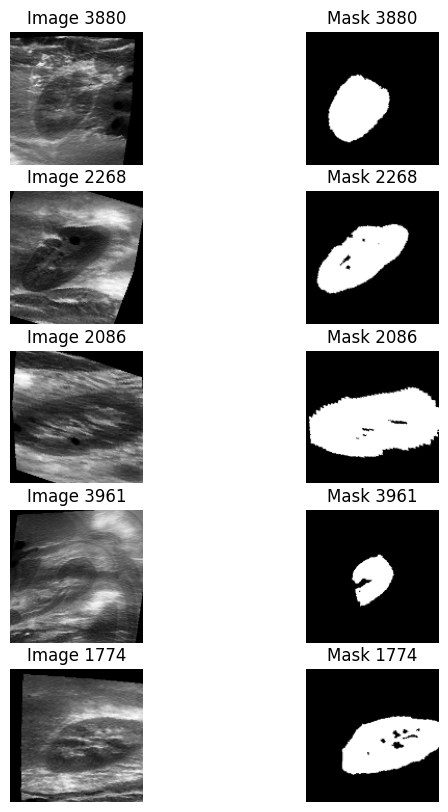

In [19]:
# plot random images with masks and labels

indeces = random.sample(range(len(dataset_2)), 5)

fig, axs = plt.subplots(5, 2, figsize=(7, 10))

for i, idx in enumerate(indeces):
    image, mask = dataset_2[idx]
    axs[i, 0].imshow(image[0], cmap="gray")
    axs[i, 1].imshow(mask[0], cmap="gray")
    axs[i, 0].set_title(f"Image {idx}")
    axs[i, 1].set_title(f"Mask {idx}")

    axs[i, 0].axis("off")
    axs[i, 1].axis("off")

In [5]:
image, mask = dataset_2[0]

print(image.shape)

torch.Size([256, 1, 256])
